1. Find the proportion of passengers in each class.
2. Count the number of passengers in each deck.
3. Plot a bar chart showing survival rates across different decks.
4. Determine the average fare for each embarkation point.

6. 

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender_df = pd.read_csv('gender_submission.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [ ]:
total_servival_df = pd.merge(test_df,gender_df, on='PassengerId', how = 'inner')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [10]:
embarkian_count = train_df['Embarked'].value_counts()
embarkian_count.head()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
class_count = train_df['Pclass'].value_counts()
pclass_pro = class_count /class_count.sum()
print(f'{pclass_pro.round(4)}')

Pclass
3    0.5511
1    0.2424
2    0.2065
Name: count, dtype: float64


C:\Users\M R Mafi\AppData\Local\Temp\ipykernel_9796\2985929858.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='Embarked', y='Survived', palette='Blues')


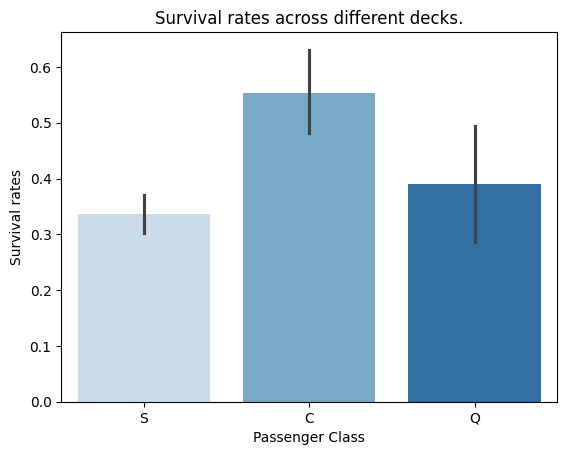

In [12]:
sns.barplot(data=train_df, x='Embarked', y='Survived', palette='Blues')
plt.title('Survival rates across different decks.')
plt.xlabel('Passenger Class')
plt.ylabel('Survival rates')
plt.show()

In [13]:
fare_embarkation = (train_df
 .groupby("Embarked")
 .agg({'Fare':'sum'})
)
total_Embarkian_count = pd.merge(embarkian_count, fare_embarkation, on='Embarked', how='inner')
avg = total_Embarkian_count['Fare']/total_Embarkian_count['count']
print(avg)

Embarked
S    27.079812
C    59.954144
Q    13.276030
dtype: float64


In [28]:
total_servival_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,famMem
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0,2


In [ ]:
total_servival_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
# 5. Calculate the survival rate for passengers with family size greater than 3.
total_servival_df['famMem'] = total_servival_df['SibSp'] + total_servival_df['Parch']
family_member_greater_than_three = total_servival_df[total_servival_df['famMem'] > 3]
servival_people = family_member_greater_than_three[family_member_greater_than_three['Survived']==1]
servial_rate = (
    servival_people['Survived'].value_counts().sum() / family_member_greater_than_three['Survived'].value_counts().sum()
) *100
print(f'{servial_rate}%')

40.0%


<Axes: xlabel='Age', ylabel='Count'>

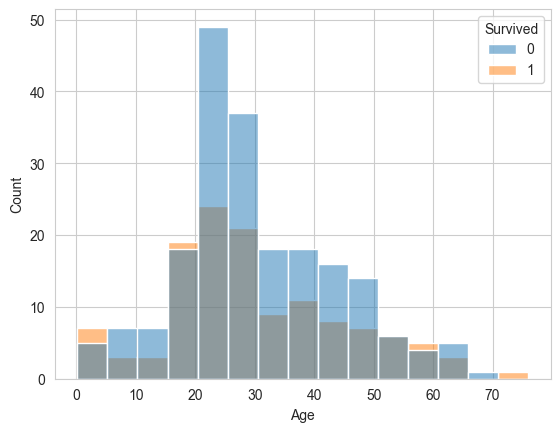

In [54]:
# Create a histogram of ages grouped by survival status.
sns.set_style('whitegrid')
sns.histplot(data=total_servival_df, x='Age', hue='Survived')
